In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os

In [2]:
filename = "../data/SFO_preciptation_2023.csv"
#data source
df = pd.read_csv(filename, delimiter=',')
keep = ['DATE', 'HourlyDryBulbTemperature', 'HourlyVisibility', 'HourlyWindSpeed','HourlyWindDirection', 'HourlyPrecipitation']
df = df[keep]
df.ffill(inplace=True)
df['timestamp']=pd.to_datetime(df['DATE'], format='%Y-%m-%dT%H:%M:%S')
df.set_index(df['timestamp'], inplace=True)
df.drop(columns=['DATE'], inplace=True)
# Drop the 'STATION' column
df.drop(columns=['timestamp'], inplace=True)
# Convert object columns to numeric
df = df.apply(pd.to_numeric, errors='coerce')
# Replace NaN values with 0.0
df.fillna(0.0, inplace=True)
df = df.iloc[2:]
#normalize each column: 
df_normalized = df.copy()  # Create a copy of the original DataFrame
columns_to_normalize = ['HourlyDryBulbTemperature', 'HourlyVisibility', 'HourlyWindSpeed', 'HourlyWindDirection', 'HourlyPrecipitation']
for column in columns_to_normalize:
    df_normalized[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
df_normalized.head()

,HourlyDryBulbTemperature,HourlyVisibility,HourlyWindSpeed,HourlyWindDirection,HourlyPrecipitation
timestamp,,,,,
2023-01-01 00:56:00,0.276667,1.0,0.208145,0.26026,0.0
2023-01-01 01:56:00,0.260000,1.0,0.140271,0.24024,0.0
2023-01-01 02:56:00,0.260000,1.0,0.280543,0.25025,0.0
2023-01-01 03:56:00,0.276667,1.0,0.420814,0.25025,0.0
2023-01-01 04:00:00,0.276667,1.0,0.420814,0.25025,0.0


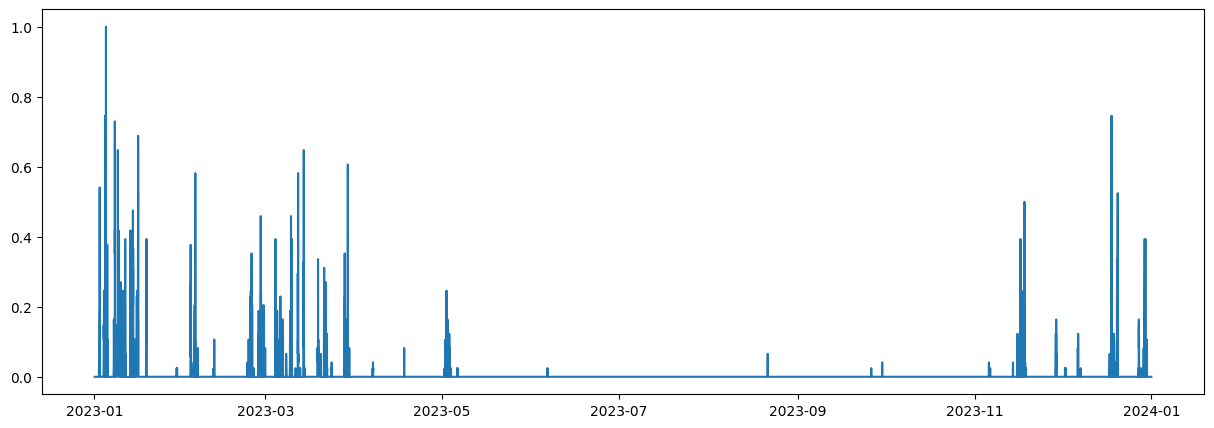

In [3]:
plt.figure(figsize =(15,5))
plt.plot(df_normalized.index, df_normalized["HourlyPrecipitation"])
plt.show()

In [4]:
#interpolate
df_normalized.shape
df_normalized.dtypes

HourlyDryBulbTemperature    float64
HourlyVisibility            float64
HourlyWindSpeed             float64
HourlyWindDirection         float64
HourlyPrecipitation         float64
dtype: object

In [5]:
df_normalized.head(50)

,HourlyDryBulbTemperature,HourlyVisibility,HourlyWindSpeed,HourlyWindDirection,HourlyPrecipitation
timestamp,,,,,
2023-01-01 00:56:00,0.276667,1.000000,0.208145,0.26026,0.000000
2023-01-01 01:56:00,0.260000,1.000000,0.140271,0.24024,0.000000
2023-01-01 02:56:00,0.260000,1.000000,0.280543,0.25025,0.000000
2023-01-01 03:56:00,0.276667,1.000000,0.420814,0.25025,0.000000
2023-01-01 04:00:00,0.276667,1.000000,0.420814,0.25025,0.000000
2023-01-01 04:56:00,0.260000,1.000000,0.325792,0.26026,0.000000
2023-01-01 05:56:00,0.260000,1.000000,0.257919,0.27027,0.000000
2023-01-01 06:56:00,0.220000,1.000000,0.162896,0.29029,0.000000
2023-01-01 07:56:00,0.260000,1.000000,0.067873,0.27027,0.000000


In [6]:
df_normalized["HourlyPrecipitation"].max()

1.0

In [7]:
# Step 1: Ensure unique timestamps by removing duplicates
df_cleaned = df_normalized.loc[~df_normalized.index.duplicated(keep='first')]

# Step 2: Define the desired number of rows (35,065)
new_size = 35065

# Step 3: Calculate how many points to interpolate between each existing timestamp
# We will calculate the number of intervals that should be inserted between each pair of timestamps
n_original = len(df_cleaned)  # Original number of rows
n_intervals = new_size - n_original  # Number of additional rows needed
points_per_interval = n_intervals // (n_original - 1)  # Evenly distribute points between intervals

# Step 4: Create a new index that includes the original timestamps and the interpolated timestamps
new_index = []
for i in range(len(df_cleaned) - 1):
    # Create a range of timestamps between each pair of original timestamps
    start = df_cleaned.index[i]
    end = df_cleaned.index[i + 1]
    new_index.extend(pd.date_range(start=start, end=end, periods=points_per_interval + 2)[:-1])

# Append the last timestamp from the original DataFrame
new_index.append(df_cleaned.index[-1])

# Step 5: Reindex the original DataFrame with the new index
df_reindexed = df_cleaned.reindex(pd.DatetimeIndex(new_index))

# Step 6: Perform linear interpolation on the reindexed DataFrame
df_interpolated = df_reindexed.interpolate(method='linear')

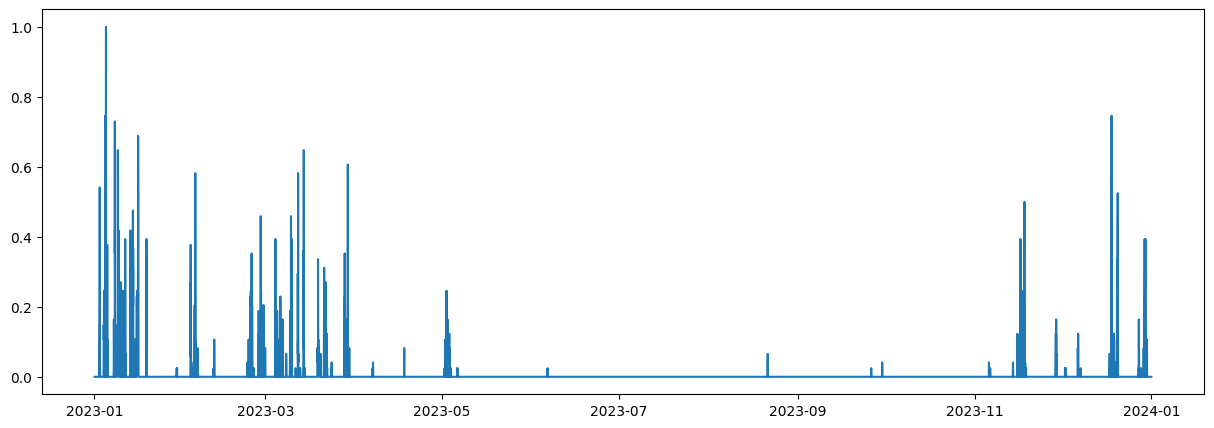

In [8]:
plt.figure(figsize =(15,5))
plt.plot(df_interpolated.index, df_interpolated["HourlyPrecipitation"])
plt.show()

In [9]:
df_interpolated.to_csv('../data/precipitation.csv')